# **Proyecto 01** – Evaluación del primer trimestre:

El objeto de este proyecto es poner en práctica los conocimientos adquiridos durante este 
primer trimestre y defenderlo en una exposición con el profesor de manera oral.

El dataset utilizado permitirá resolver un problema de regresión o de clasificación, ha de ser de 
tu elección y propuesto al profesor, para considerar si es no adecuado para el esfuerzo 
estimado de este proyecto.

En el proyecto se han de incluir los siguientes apartados:
1. **(0,5 Puntos)** Explicación del problema y del dataset a utilizar.
2. **(0,5 Puntos)** Importación del dataset.
3. **(1 Punto)** Revisar los datos y considerar el aplicar escalamiento de datos, conversión de variables categóricas a numéricas, etc…
4. **(1 Punto)** Realizar una selección de aquellas características que consideres mejores para el entrenamiento del modelo. Indicar las herramientas (matriz de correlación, pairplot, etc…) utilizada para seleccionar las variables/características y argumentar los criterios/el criterio en las selección de las variables y características.
5. **(2 Puntos)** Utilizar y comparar al menos dos modelos diferentes (De NaiveBayes sólo escoger uno), para elegir aquel que consideres adecuado en la resolución del problema. Recoger en la memoria los parámetros utilizados y el criterio de calidad (por ejemplo la precisión, MAE, etc…) que has decido utilizar para escoger un modelo. **Es fundamental/obligado el aplicar la técnica de la validación cruzada (Cross validation)**.
6. Una vez decides el modelo que consideras mejor, entonces realizar las siguientes 
tareas:
  - **(0,75 Puntos)** Entrenarlo y obtener la matriz de confusión.
  - **(0,75 Puntos)** Exportar a un fichero los parámetros del modelo entrenado.
  - **(0,75 Puntos)** Importar los parámetros del modelo.
  - **(0,75 Puntos)** Aplicar el modelo (predict) a todos los datos del dataset y obtener la matriz de confusión.
7. **(1 Punto)** Montar una pequeña aplicación web con un servicio API donde se importará el modelo entrenado y que permitirá validar al usuario final la validez del modelo propuesto.
8. **(1 Punto)** Defensa del proyecto.

## 1. Explicación del problema y del dataset a utilizar.

El objetivo de este proyecto es desarrollar un **modelo de clasificación de especies de pingüinos** mediante el uso de técnicas de aprendizaje automático. La idea es utilizar medidas físicas de los pingüinos, tales como la longitud del pico, la longitud de las aletas y el peso del cuerpo, para predecir a qué especie pertenece cada individuo.

El dataset proporcionado tiene 7 columnas, cada una de las cuales representa una característica o atributo de los pingüinos:

- 'species': es la columna objetivo, representa la especie a la que pertenece el pingüino.

- 'island': representa la isla donde se encuentra el pingüino.

- 'bill_length_mm': representa la longitud del pico del pingüino en milímetros.

- 'bill_depth_mm': representa la profundidad del pico del pingüino en milímetros.

- 'flipper_length_mm': representa la longitud de las aletas del pingüino en milímetros.

- 'body_mass_g': representa el peso del cuerpo del pingüino en gramos.

- 'sex': representa el sexo del pingüino (masculino o femenino).

El modelo se entrenará con un conjunto de datos etiquetados, donde las medidas físicas y la especie son conocidas, y luego se utilizará para hacer predicciones sobre un conjunto de datos desconocido.

Para construir el modelo, se utilizarán técnicas de preprocesamiento de datos, como la selección de características y la codificación de variables categóricas a variables numéricas, se elegirá un algoritmo de clasificación adecuado, se ajustará y validará el modelo con diferentes conjuntos de datos, y se evaluará su rendimiento utilizando métricas de clasificación adecuadas.

Al finalizar este proyecto, se habrá desarrollado un modelo de clasificación de especies de pingüinos capaz de predecir a qué especie pertenece un individuo en función de sus medidas físicas. Este modelo será integrado en una aplicación web, mediante un servicio API, permitiendo a los usuarios finales validar su precisión y eficacia.

## 2. Importación del dataset

In [ ]:
# Importación de librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.externals
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
import joblib

In [ ]:
# Importación de los datos

df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 3. Revisar los datos y considerar el aplicar escalamiento de datos, conversión de variables categóricas a numéricas, etc…

In [ ]:
# Elimina filas que contengan algún valor NaN

df.dropna(inplace=True)

In [ ]:
# Conversión de valores categóricos a numéricos:

# 0 - Adelie, 1 - Chinstrap, 2 - Gentoo
df['species'] = df['species'].astype('category').cat.codes

# 0 - Biscoe, 1 - Dream, 2 - Torgersen
df['island'] = df['island'].astype('category').cat.codes

# 0 - FEMALE, 1 - MALE 
df['sex'] = df['sex'].astype('category').cat.codes

> En general, es recomendable escalar los datos antes de aplicar un algoritmo de aprendizaje automático si los atributos tienen diferentes unidades de medida o rango de valores. Sin embargo, en este caso, de un modelo de clasificación de especies de pingüinos, donde las características son medidas físicas, como la longitud y profundidad de los picos y las aletas, y el peso del cuerpo, no es necesario escalar los datos. Estas medidas ya están en la misma unidad de medida (milímetros o gramos) y tienen un rango de valores similares.

> Pero, se escalaría de la siguiente manera:

In [ ]:
"""
scaler = MinMaxScaler()
df['bill_length_mm'] = scaler.fit_transform(df[['bill_length_mm']])
df['bill_depth_mm'] = scaler.fit_transform(df[['bill_depth_mm']])
df['flipper_length_mm'] = scaler.fit_transform(df[['flipper_length_mm']])
df['body_mass_g'] = scaler.fit_transform(df[['body_mass_g']])
df
"""

"\nscaler = MinMaxScaler()\ndf['bill_length_mm'] = scaler.fit_transform(df[['bill_length_mm']])\ndf['bill_depth_mm'] = scaler.fit_transform(df[['bill_depth_mm']])\ndf['flipper_length_mm'] = scaler.fit_transform(df[['flipper_length_mm']])\ndf['body_mass_g'] = scaler.fit_transform(df[['body_mass_g']])\ndf\n"

In [ ]:
# Estadísticas descriptivas

df.describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.918919,0.651652,43.992793,17.164865,200.966967,4207.057057,0.504505
std,0.889718,0.714715,5.468668,1.969235,14.015765,805.215802,0.500732
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,0.000000,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,1.000000,1.000000,44.500000,17.300000,197.000000,4050.000000,1.000000
75%,2.000000,1.000000,48.600000,18.700000,213.000000,4775.000000,1.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000


## 4. Realizar una selección de aquellas características que consideres mejores para el entrenamiento del modelo. Indicar las herramientas (matriz de correlación, pairplot, etc…) utilizada para seleccionar las variables/características y argumentar los criterios/el criterio en las selección de las variables y características.

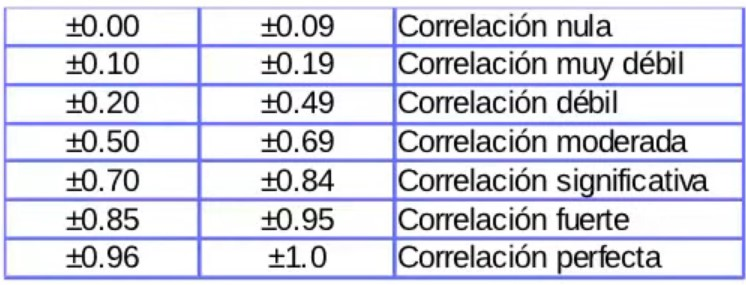

In [ ]:
# Mostramos la matriz de correlación

df.corr()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.622428,0.730548,-0.740346,0.850737,0.750434,0.010964
island,-0.622428,1.000000,-0.337179,0.568031,-0.554413,-0.559526,-0.012435
bill_length_mm,0.730548,-0.337179,1.000000,-0.228626,0.653096,0.589451,0.344078
bill_depth_mm,-0.740346,0.568031,-0.228626,1.000000,-0.577792,-0.472016,0.372673
flipper_length_mm,0.850737,-0.554413,0.653096,-0.577792,1.000000,0.872979,0.255169
body_mass_g,0.750434,-0.559526,0.589451,-0.472016,0.872979,1.000000,0.424987
sex,0.010964,-0.012435,0.344078,0.372673,0.255169,0.424987,1.000000


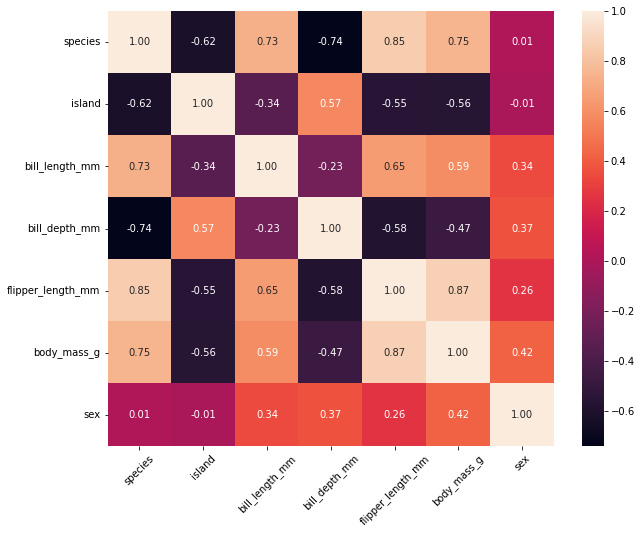

In [ ]:
# Mostramos la matriz de correlación
# como un mapa de calor 

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
ax.set_xticklabels(
    labels=df.columns.values,
    rotation=45,
    horizontalalignment='center'
);
plt.show()

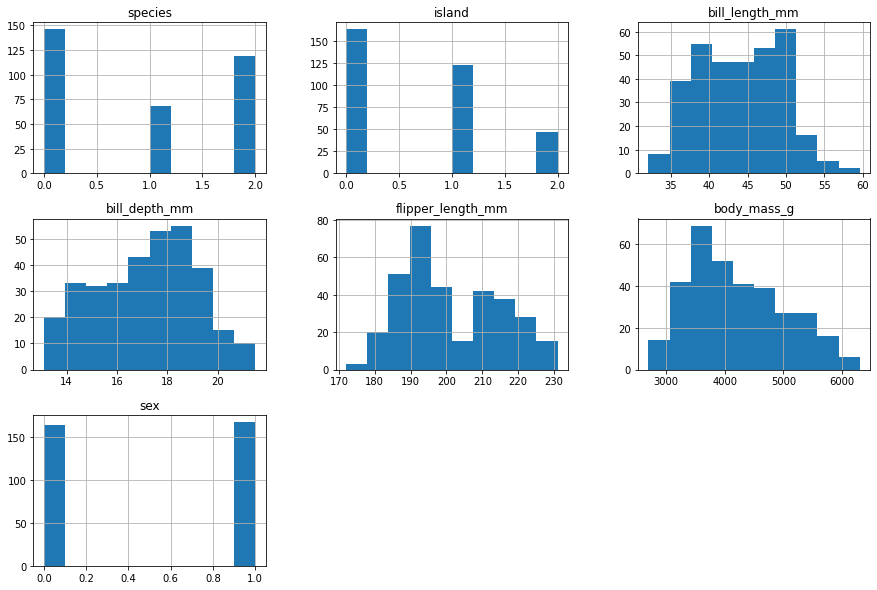

In [ ]:
# Mostramos los histogramas

df.hist(figsize=(15,10))
plt.show()

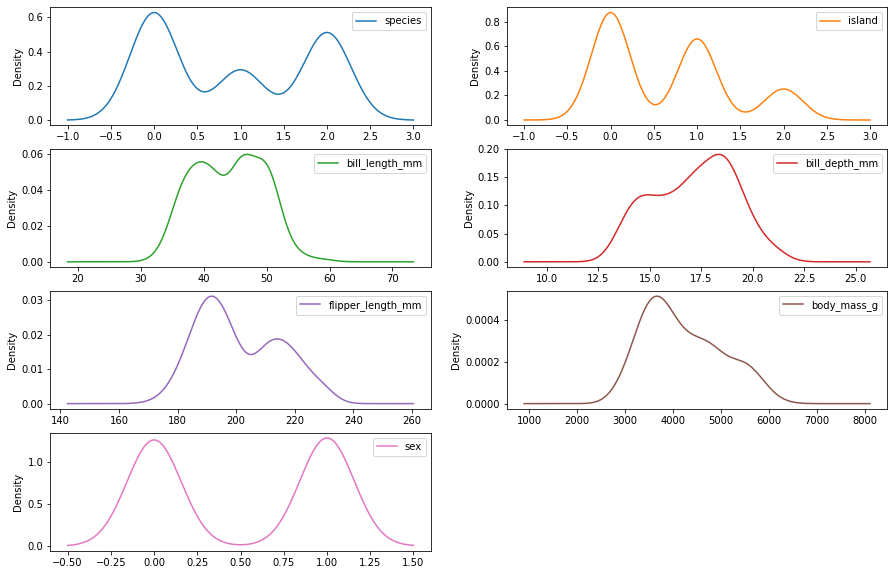

In [ ]:
# Mostramos las gráficas de densidad

df.plot(kind='density', subplots=True, layout=(4,2), figsize=(15,10), sharex=False)
plt.show()

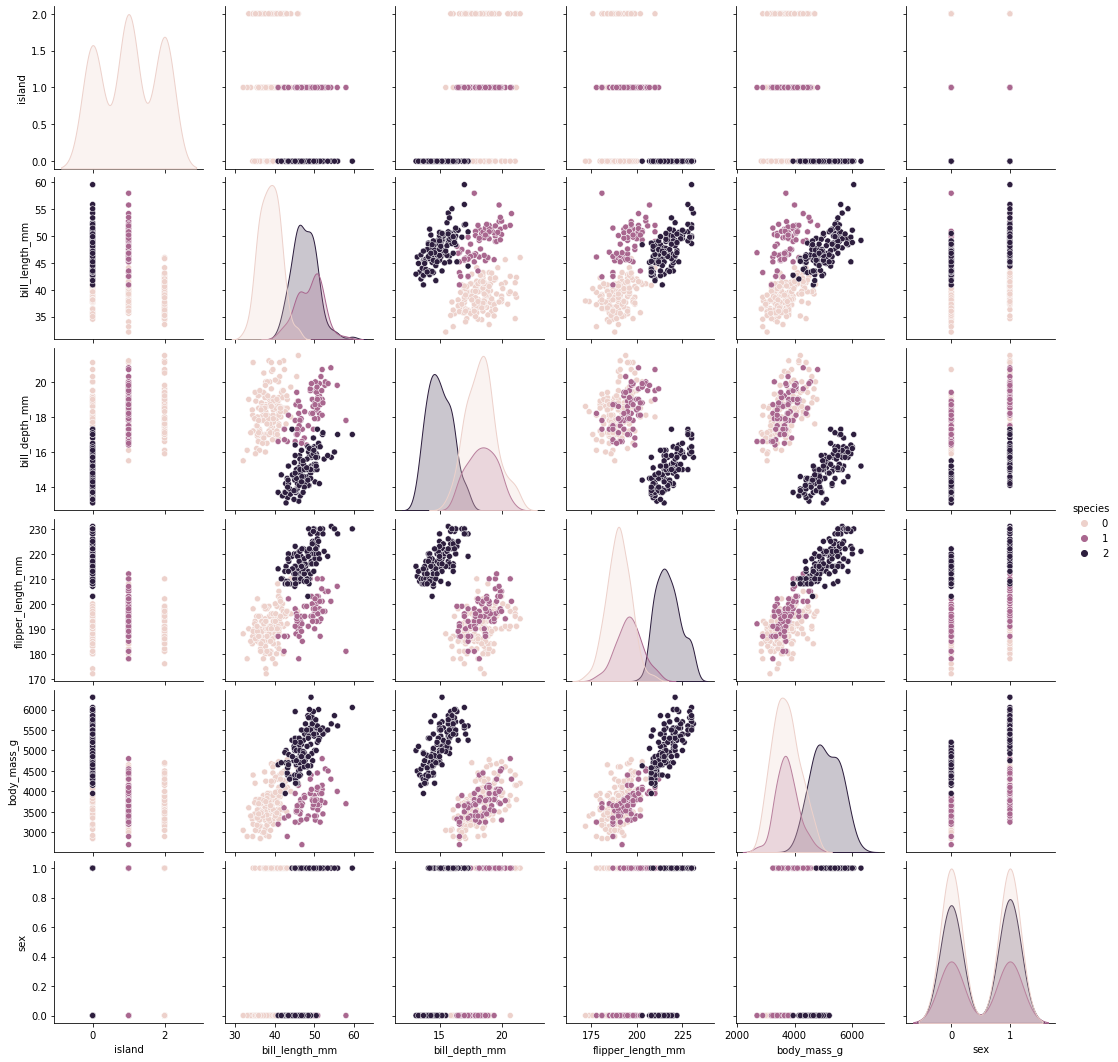

In [ ]:
# Mostramos el diagrama de pares (pairplot)

sns.pairplot(df, hue='species')

> En este caso, observamos que las columnas `island` y `sex`, no tienen relación con el problema que se está tratando de resolver, ya que no proporcionan información útil para el modelo de clasificación de especies de pingüinos, por lo que pueden afectar negativamente al rendimiento del modelo.

In [ ]:
# Eliminación de las columnas

df = df.drop('island', axis=1)
# df = df.drop('bill_depth_mm', axis=1)
df = df.drop('sex', axis=1)

In [ ]:
# Dataframe final a utilizar

df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,39.1,18.7,181.0,3750.0
1,0,39.5,17.4,186.0,3800.0
2,0,40.3,18.0,195.0,3250.0
4,0,36.7,19.3,193.0,3450.0
5,0,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,2,47.2,13.7,214.0,4925.0
340,2,46.8,14.3,215.0,4850.0
341,2,50.4,15.7,222.0,5750.0
342,2,45.2,14.8,212.0,5200.0


In [ ]:
df.describe()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.918919,43.992793,17.164865,200.966967,4207.057057
std,0.889718,5.468668,1.969235,14.015765,805.215802
min,0.000000,32.100000,13.100000,172.000000,2700.000000
25%,0.000000,39.500000,15.600000,190.000000,3550.000000
50%,1.000000,44.500000,17.300000,197.000000,4050.000000
75%,2.000000,48.600000,18.700000,213.000000,4775.000000
max,2.000000,59.600000,21.500000,231.000000,6300.000000


In [ ]:
# Separamos datos de entrada y salida

x_df = df.drop('species', axis=1)
y_df = df['species']

# Separamos train y test

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=1)

##  5. Utilizar y comparar al menos dos modelos diferentes (De NaiveBayes sólo escoger uno), para elegir aquel que consideres adecuado en la resolución del problema. Recoger en la memoria los parámetros utilizados y el criterio de calidad (por ejemplo la precisión, MAE, etc…) que has decido utilizar para escoger un modelo. Es fundamental/obligado el aplicar la técnica de la validación cruzada (Cross validation)

### Modelos de NaiveBayes

#### Sin CrossValidation

In [ ]:
# Modelos NaiveBayes
names = ['GaussianNB', 'MultiNomialNB', 'BernouilliNB', 'ComplementNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()]

for name, clf in zip(names, classifiers):
  
  # Entrena el modelo
  clf.fit(x_train, y_train)

  # Predice y puntua
  # Devuelve la precisión media de las etiquetas y los datos de prueba proporcionados
  score = clf.score(x_test, y_test)
  print ("Modelo: %s = %.2f" % (name, score))

Modelo: GaussianNB = 0.99
Modelo: MultiNomialNB = 0.73
Modelo: BernouilliNB = 0.42
Modelo: ComplementNB = 0.60


#### Con CrossValidation

In [ ]:
cv = KFold(n_splits = 5, shuffle = True) 
total_scores = []
for name, clf in zip(names, classifiers):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(x_train):

    # División train test aleatoria
    # Extrae la información (iloc), 
    # atendiendo a los indices obtenidos por CrossValidation
    f_train_x = x_train.iloc[train_fold]
    f_train_y = y_train.iloc[train_fold]

    # Entrenamiento y ejeución del modelo
    clf.fit(f_train_x, f_train_y)

    # Realizamos la predicción (Final evaluation) 
    # y guardamos la precisión para calcular la media posteriormente
    y_pred = clf.predict(x_train.iloc[test_fold])

    # Evaluación del modelo
    acc = accuracy_score(y_train.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)

  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo: %s = %.2f" % (names[i], total_scores[i]))

Modelo: GaussianNB = 0.97
Modelo: MultiNomialNB = 0.82
Modelo: BernouilliNB = 0.44
Modelo: ComplementNB = 0.71


### Modelo KNN (K-Nearest neighbors)

#### Sin CrossValidation

In [ ]:
# Instanciamos del modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenamiento y ejeución del modelo
knn.fit(x_train, y_train)

# Evaluación del modelo
y_pred = knn.predict(x_test)

# Calcular la precisión del modelo
accuracy = knn.score(x_test, y_test)
print("Modelo: %s = %.2f" % ("KNN", accuracy))

Modelo: KNN = 0.78


#### Con CrossValidation

In [ ]:
# Instanciamos modelo de clasificación KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Evaluación del modelo con Cross Validation
scores = cross_val_score(knn, x_train, y_train, cv=5)
print("Modelo: %s = %.2f" % ("KNN", np.mean(scores)))

Modelo: KNN = 0.76


> Un valor más alto para n_neighbors hará que el modelo sea menos sensible a los ruidos de los datos, pero también puede causar un aumento en el sesgo. Un valor más bajo hará que el modelo sea más sensible a los ruidos de los datos, pero también puede causar un aumento en la varianza. Por lo tanto, es importante encontrar un equilibrio adecuado entre estos dos factores al seleccionar el valor de n_neighbors.

> Después de evaluar varios algoritmos de clasificación, llegamos a la conclusión de que el modelo **GaussianNB() con CrossValidation** es el que ofrece el mejor rendimiento para el problema de clasificación de especies de pingüinos.

## 6. Una vez decides el modelo que consideras mejor, entonces realizar las siguientes tareas:

### Entrenarlo y obtener la matriz de confusión

In [ ]:
# Instanciamos el modelo

model = GaussianNB()

# Cross Validation
y_pred = cross_val_score(model, x_train, y_train, cv=5)

# Entrenamiento y ejeución del modelo
model.fit(x_train, y_train)

# Evaluación del modelo
y_model = model.predict(x_test)

In [ ]:
# Predicción con nuevos datos

y_model

array([0, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2, 1,
       2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0,
       1], dtype=int8)

In [ ]:
# Evaluación y precisión del modelo

y_pred.mean()

0.9663172606568832

[[27  1  0]
 [ 0 17  0]
 [ 0  0 22]]


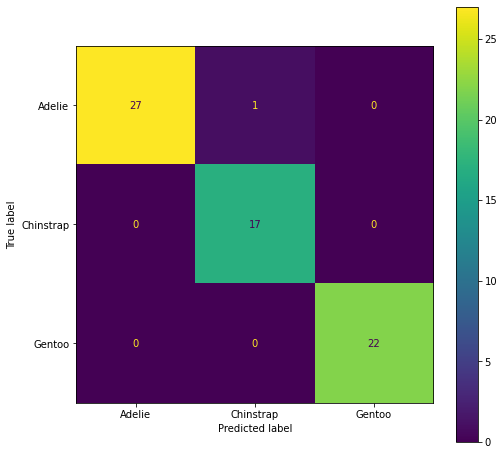

In [ ]:
# Matriz de confusión
# 0 - Adelie, 1 - Chinstrap, 2 - Gentoo

cm = confusion_matrix(y_test, y_model)
print(cm)
display_cm = ConfusionMatrixDisplay(cm, display_labels=['Adelie', 'Chinstrap', 'Gentoo'])
fig, ax = plt.subplots(figsize=(8,8))
display_cm.plot(ax=ax)
plt.show()

### Exportar a un fichero los parámetros del modelo entrenado

In [ ]:
# Exportamos el modelo

joblib.dump(model,'pinguinos.pkl')

['pinguinos.pkl']

### Importar los parámetros del modelo

In [ ]:
# Importamos el modelo

import_model = joblib.load('pinguinos.pkl')
y_pred_import = cross_val_score(import_model, x_train, y_train, cv=5)
y_pred_import.mean()

0.9663172606568832

### Aplicar el modelo (predict) a todos los datos del dataset y obtener la matriz de confusión

[[27  1  0]
 [ 0 17  0]
 [ 0  0 22]]


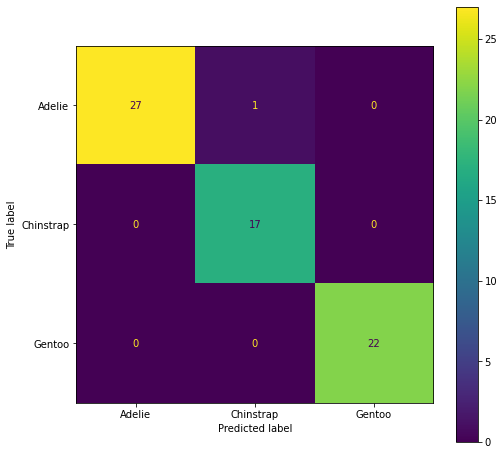

In [ ]:
# Realizamos la predicción

y_model_import = import_model.predict(x_test)

# Matriz de Confusión

cm_import = confusion_matrix(y_test, y_model_import)
print(cm_import)
display_cm_import = ConfusionMatrixDisplay(cm_import, display_labels=['Adelie', 'Chinstrap', 'Gentoo'])
fig, ax = plt.subplots(figsize=(8,8))
display_cm_import.plot(ax=ax)
plt.show()